In [32]:
import torch
import torch.nn as nn
import torch
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Dataset

from sklearn.model_selection import train_test_split


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
import glob
import random

In [2]:
learning_rate = 0.001
batch_size = 10
epochs = 10

device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(1234)
if device == 'cuda':
    torch.cuda.manual_seed_all(1234)


print(device)

cpu


In [4]:
def create_dataset():
    annotation1 = pd.read_csv(os.path.join("D:\\", "PP_lab2", "PP_lab2", "annotation1.csv"), sep=',',
                              header=None, encoding='UTF-8')
    annotation2 = pd.read_csv(os.path.join("D:\\", "PP_lab2", "PP_lab2", "annotation2.csv"), sep=',',
                              header=None, encoding='UTF-8')
    df = pd.concat([annotation1, annotation2], ignore_index=True)
    df.rename(columns={0: 'absolute_path', 1: 'dataset_class'}, inplace=True)
    return df

df = create_dataset() 
print(df)

                                     absolute_path dataset_class
0        D:\PP_lab2\PP_lab2\dataset\zebra\0000.jpg         zebra
1        D:\PP_lab2\PP_lab2\dataset\zebra\0001.jpg         zebra
2        D:\PP_lab2\PP_lab2\dataset\zebra\0002.jpg         zebra
3        D:\PP_lab2\PP_lab2\dataset\zebra\0003.jpg         zebra
4        D:\PP_lab2\PP_lab2\dataset\zebra\0004.jpg         zebra
...                                            ...           ...
1994  D:\PP_lab2\PP_lab2\dataset\bayhorse\0994.jpg      bayhorse
1995  D:\PP_lab2\PP_lab2\dataset\bayhorse\0995.jpg      bayhorse
1996  D:\PP_lab2\PP_lab2\dataset\bayhorse\0996.jpg      bayhorse
1997  D:\PP_lab2\PP_lab2\dataset\bayhorse\0997.jpg      bayhorse
1998  D:\PP_lab2\PP_lab2\dataset\bayhorse\0998.jpg      bayhorse

[1999 rows x 2 columns]


In [11]:
def create_dataset():
    annotation1 = pd.read_csv(os.path.join("D:\\", "PP_lab2", "PP_lab2", "annotation1.csv"), sep=',',
                              header=None, encoding='UTF-8')
    annotation2 = pd.read_csv(os.path.join("D:\\", "PP_lab2", "PP_lab2", "annotation2.csv"), sep=',',
                              header=None, encoding='UTF-8')
    df = pd.concat([annotation1, annotation2], ignore_index=True)
    df.rename(columns={0: 'absolute_path', 1: 'dataset_class'}, inplace=True)
    return df


train_path = "D:/pp_lab5/train"
test_path = "D:/pp_lab5/test"
val_path = "D:/pp_lab5/val"
df = create_dataset() 


if not os.path.isdir(train_path):
    os.mkdir(train_path)

if not os.path.isdir(test_path):
    os.mkdir(test_path)

if not os.path.isdir(val_path):
    os.mkdir(val_path)


def load_train(df: pd.core.frame.DataFrame, path: str, i: int) -> None:
    '''
    dowload img from dataframe with path
    '''
    image_path = df.absolute_path[i]
    image = cv2.imread(image_path)
    cv2.imwrite(os.path.join(path, f'{df.dataset_class[i]}.{i}.jpg'), image)


def load_val(df: pd.core.frame.DataFrame, path: str, i: int) -> None:
    '''
    dowload img from dataframe with path
    '''
    image_path = df.absolute_path[i]
    image = cv2.imread(image_path)
    cv2.imwrite(os.path.join(path, f'{i}.jpg'), image)

def load_test(df: pd.core.frame.DataFrame, path: str, i: int) -> None:
    '''
    dowload img from dataframe with path, work with separation 80:10:10
    '''
    image_path = df.absolute_path[i]
    image = cv2.imread(image_path)
    cv2.imwrite(os.path.join(path, f'{i}.jpg'), image)


for i in range(800):
    load_train(df, train_path, i)
for i in range(1000,1800):
    load_train(df, train_path, i)
for i in range(800,900):
    load_test(df,test_path,i)
for i in range(1800,1900):
    load_test(df,test_path,i)
for i in range(900,1000):
    load_val(df,val_path,i)
for i in range(1900,1999):
    load_val(df,val_path,i)


train_list = glob.glob(os.path.join(train_path, '*.jpg'))
test_list = glob.glob(os.path.join(test_path, '*.jpg'))
val_list = glob.glob(os.path.join(val_path, '*.jpg'))


train_list, val_list = train_test_split(train_list, test_size=0.1)

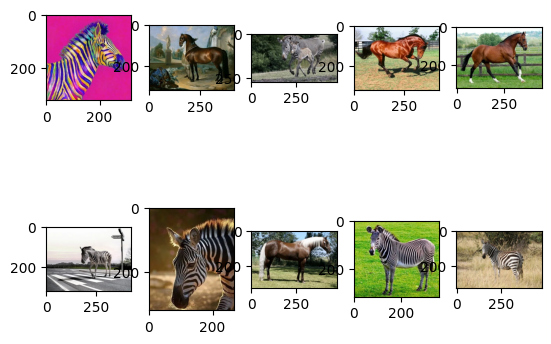

In [12]:
random_idx = np.random.randint(1,200,size=10)

fig = plt.figure()
i=1
for idx in random_idx:
    ax = fig.add_subplot(2,5,i)
    img = cv2.imread(train_list[idx])
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    i+=1

plt.show()

In [13]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet,self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(3,16,kernel_size=3, padding=0,stride=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(16,32, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
            )

        self.layer3 = nn.Sequential(
            nn.Conv2d(32,64, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )


        self.fc1 = nn.Linear(3*3*64,10)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(10,2)
        self.relu = nn.ReLU()


    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0),-1)
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        return out

model = ConvNet().to(device)
model.train()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [14]:
train_transforms =  transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ])

val_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
    ])

In [21]:
from PIL import Image

class dataset(torch.utils.data.Dataset):
    def __init__(self,file_list,transform=None):
        self.file_list = file_list
        self.transform = transform

    def __len__(self):
        self.filelength = len(self.file_list)
        return self.filelength

    def __getitem__(self,idx):
        img_path = self.file_list[idx]
        img = Image.open(img_path)
        img_transformed = self.transform(img)

        label = img_path.split('\\')[-1].split('.')[0]
        if label == 'zebra':
            label = 1
        elif label == 'bayhorse':
            label = 0

        return img_transformed,label


train_data = dataset(train_list, transform=train_transforms)
test_data = dataset(test_list, transform=test_transforms)
val_data = dataset(val_list, transform=val_transforms)

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=10, shuffle=True )
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size=10, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=10, shuffle=True)

Learning rate: 0.001, Batch size: 10
Epoch : 1, train accuracy : 0.8611114025115967, train loss : 0.315507709980011
Epoch : 1, val_accuracy : 0.862500011920929, val_loss : 0.3162567615509033
Epoch : 2, train accuracy : 0.9034724235534668, train loss : 0.21780149638652802
Epoch : 2, val_accuracy : 0.90625, val_loss : 0.23956291377544403
Epoch : 3, train accuracy : 0.9118054509162903, train loss : 0.20505180954933167
Epoch : 3, val_accuracy : 0.918749988079071, val_loss : 0.20822305977344513
Epoch : 4, train accuracy : 0.9180551767349243, train loss : 0.18878619372844696
Epoch : 4, val_accuracy : 0.9249999523162842, val_loss : 0.1881175935268402
Epoch : 5, train accuracy : 0.9298608303070068, train loss : 0.17968973517417908
Epoch : 5, val_accuracy : 0.9062498807907104, val_loss : 0.19123759865760803
Epoch : 6, train accuracy : 0.9388883709907532, train loss : 0.1738489717245102
Epoch : 6, val_accuracy : 0.9437499642372131, val_loss : 0.11490236222743988
Epoch : 7, train accuracy : 0.943

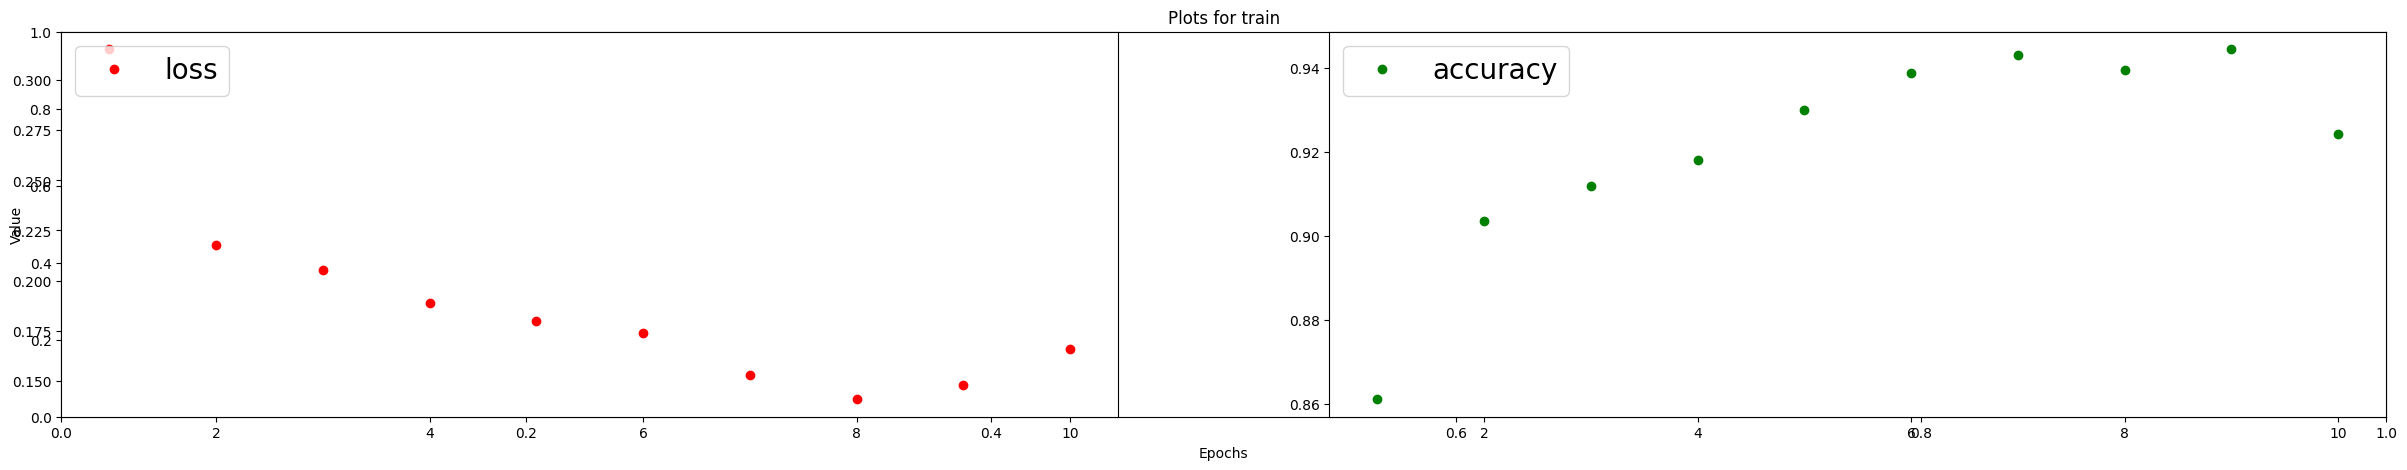

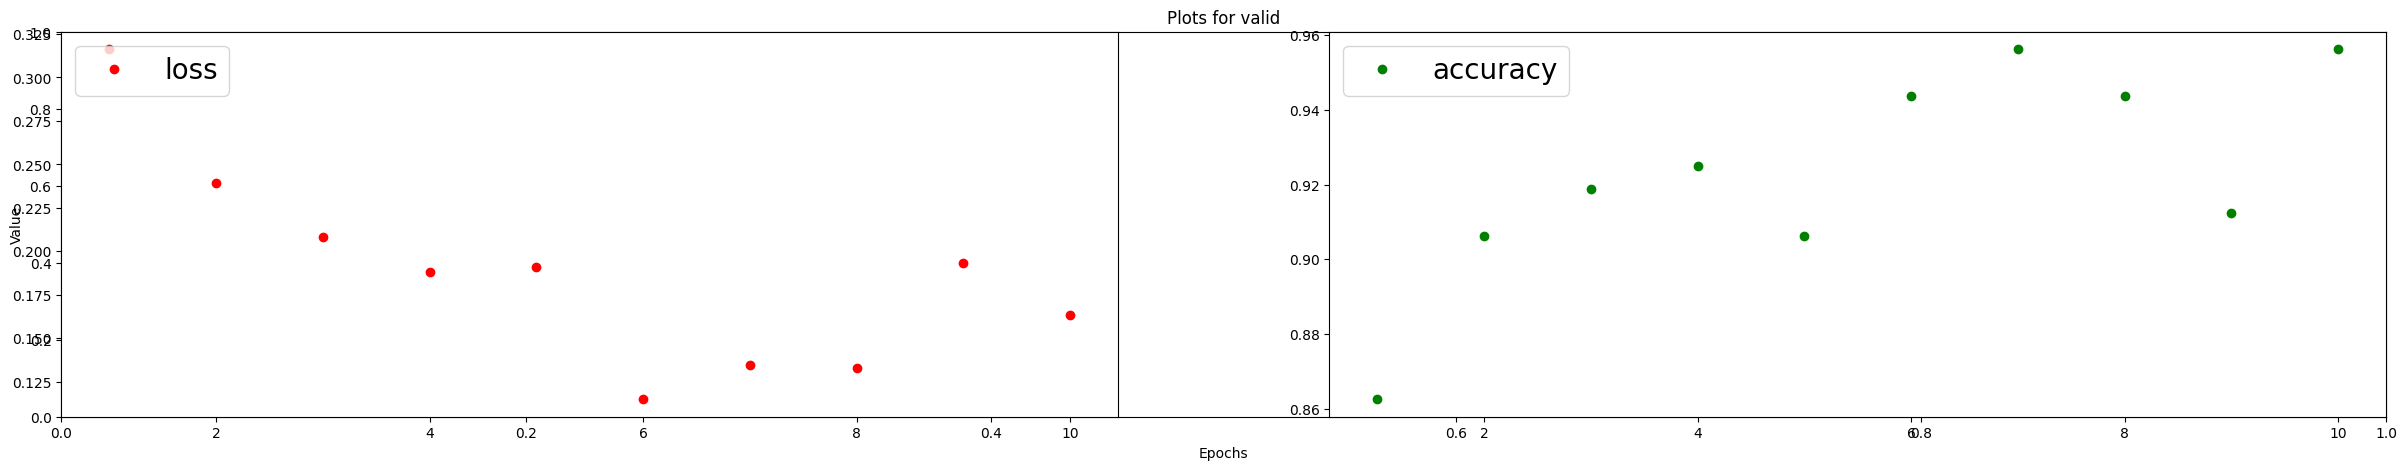

In [22]:
print('Learning rate: 0.001, Batch size: 10')

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=10, shuffle=True )
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size=10, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=10, shuffle=True)

epochs = 10
def train_loop (train_loader, val_loader, epochs):
    val_loss_list = []
    val_accuracy_list = []

    loss_list = []
    accuracy_list = []

    for epoch in range(epochs):
        epoch_loss = 0
        epoch_accuracy = 0

        for data, label in train_loader:
            data = data.to(device)
            label = label.to(device)

            output = model(data)
            loss = criterion(output, label)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            acc = ((output.argmax(dim=1) == label).float().mean())
            epoch_accuracy += acc/len(train_loader)
            epoch_loss += loss/len(train_loader)

        loss_list.append(epoch_loss.item())
        accuracy_list.append(epoch_accuracy.item())

        print('Epoch : {}, train accuracy : {}, train loss : {}'.format(epoch+1, epoch_accuracy,epoch_loss))


        with torch.no_grad():
            epoch_val_accuracy=0
            epoch_val_loss =0

            for data, label in val_loader:
                data = data.to(device)
                label = label.to(device)

                val_output = model(data)
                val_loss = criterion(val_output,label)

                acc = ((val_output.argmax(dim=1) == label).float().mean())
                epoch_val_accuracy += acc/ len(val_loader)
                epoch_val_loss += val_loss/ len(val_loader)


            val_loss_list.append(epoch_val_loss.item())
            val_accuracy_list.append(epoch_val_accuracy.item())

            print('Epoch : {}, val_accuracy : {}, val_loss : {}'.format(epoch+1, epoch_val_accuracy,epoch_val_loss))


    num_epochs = [i+1 for i in range(epochs)]

    fig = plt.figure(figsize=(30, 5))
    plt.title('Plots for train')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    fig.add_subplot(1,2,1)
    plt.plot(num_epochs, loss_list, 'ro', label = 'loss')
    plt.legend(loc=2, prop={'size': 20})
    fig.add_subplot(1,2,2)
    plt.plot(num_epochs, accuracy_list, 'go', label = 'accuracy')
    plt.legend(loc=2, prop={'size': 20})

    fig = plt.figure(figsize=(30, 5))
    plt.title('Plots for valid')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    fig.add_subplot(1,2,1)
    plt.plot(num_epochs, val_loss_list, 'ro', label = 'loss')
    plt.legend(loc=2, prop={'size': 20})
    fig.add_subplot(1,2,2)
    plt.plot(num_epochs, val_accuracy_list, 'go', label = 'accuracy')
    plt.legend(loc=2, prop={'size': 20})

train_loop(train_loader, val_loader, epochs)

Learning rate: 0.0005, Batch size: 10
Epoch : 1, train accuracy : 0.9555550217628479, train loss : 0.12617143988609314
Epoch : 1, val_accuracy : 0.9312499761581421, val_loss : 0.1746554970741272
Epoch : 2, train accuracy : 0.9687491059303284, train loss : 0.0933920294046402
Epoch : 2, val_accuracy : 0.9437499642372131, val_loss : 0.16420701146125793
Epoch : 3, train accuracy : 0.9604160189628601, train loss : 0.09401313960552216
Epoch : 3, val_accuracy : 0.9687499403953552, val_loss : 0.07802450656890869
Epoch : 4, train accuracy : 0.9631937146186829, train loss : 0.09311068058013916
Epoch : 4, val_accuracy : 0.981249988079071, val_loss : 0.06698760390281677
Epoch : 5, train accuracy : 0.9638881683349609, train loss : 0.11217248439788818
Epoch : 5, val_accuracy : 0.9562499523162842, val_loss : 0.1258552223443985
Epoch : 6, train accuracy : 0.9659712314605713, train loss : 0.08777939528226852
Epoch : 6, val_accuracy : 0.9499999284744263, val_loss : 0.12515786290168762
Epoch : 7, train a

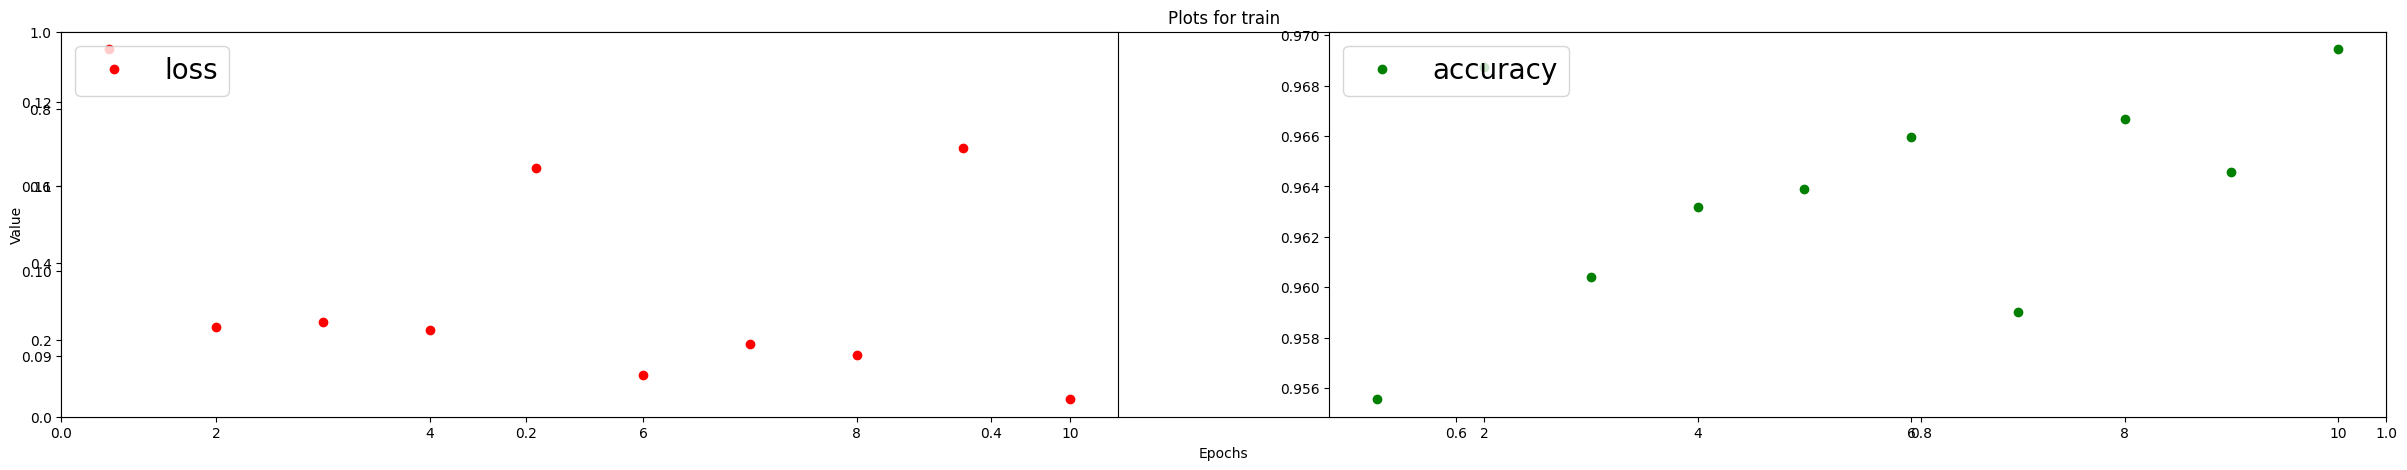

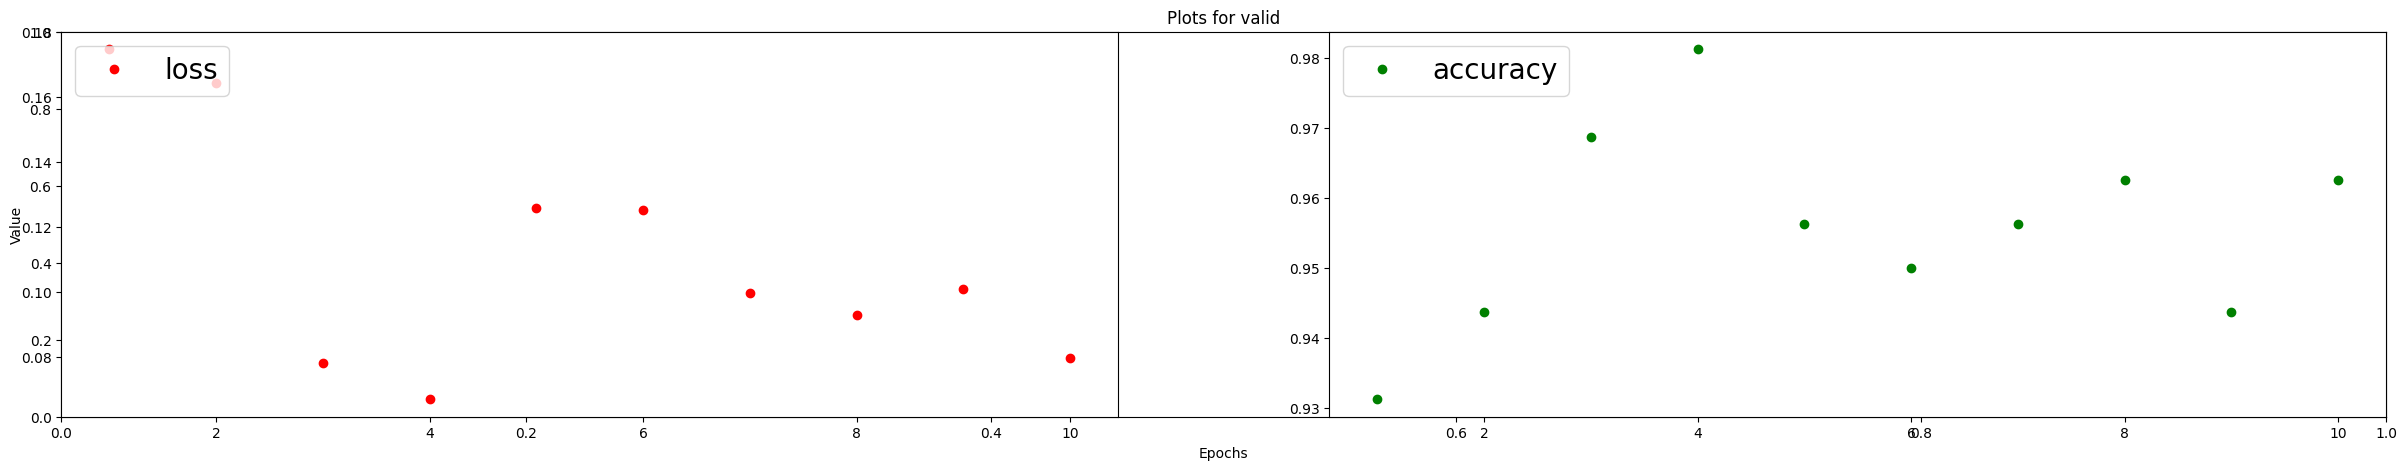

In [23]:
print('Learning rate: 0.0005, Batch size: 10')

optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=10, shuffle=True )
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size=10, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=10, shuffle=True)

train_loop(train_loader, val_loader, epochs)

Learning rate: 0.0007, Batch size: 10
Epoch : 1, train accuracy : 0.9562495350837708, train loss : 0.11400480568408966
Epoch : 1, val_accuracy : 0.9562499523162842, val_loss : 0.07501824200153351
Epoch : 2, train accuracy : 0.9673603177070618, train loss : 0.09435763955116272
Epoch : 2, val_accuracy : 0.9687499403953552, val_loss : 0.08459217846393585
Epoch : 3, train accuracy : 0.9666659235954285, train loss : 0.09678640961647034
Epoch : 3, val_accuracy : 0.9749999642372131, val_loss : 0.07943132519721985
Epoch : 4, train accuracy : 0.9583325386047363, train loss : 0.09814533591270447
Epoch : 4, val_accuracy : 0.9624999761581421, val_loss : 0.12998522818088531
Epoch : 5, train accuracy : 0.9631938338279724, train loss : 0.10199959576129913
Epoch : 5, val_accuracy : 0.9312499761581421, val_loss : 0.16105450689792633
Epoch : 6, train accuracy : 0.9618048667907715, train loss : 0.09281519800424576
Epoch : 6, val_accuracy : 0.9812499284744263, val_loss : 0.061083484441041946
Epoch : 7, tr

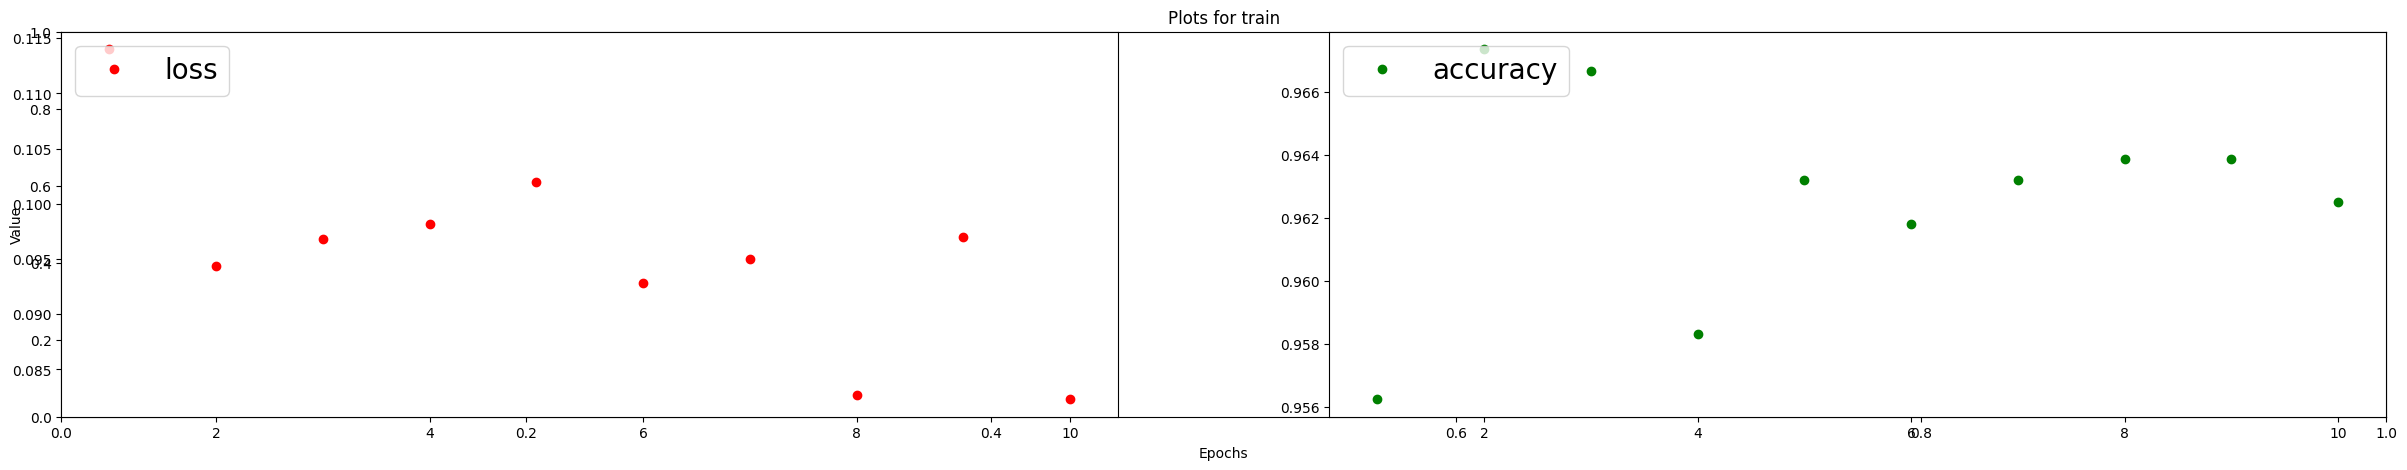

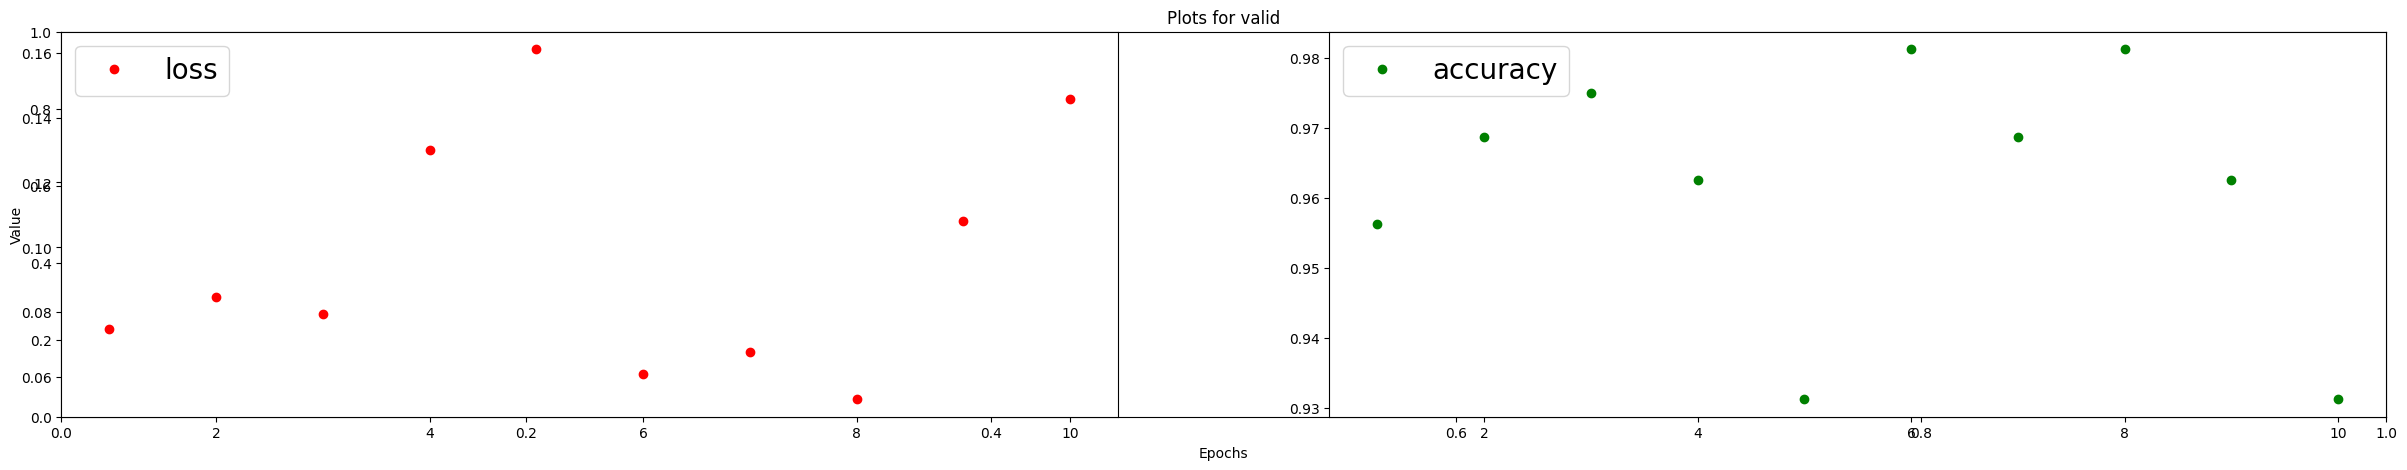

In [24]:
print('Learning rate: 0.0007, Batch size: 10')

optimizer = torch.optim.Adam(model.parameters(), lr=0.0007)

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=10, shuffle=True )
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size=10, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=10, shuffle=True)

train_loop(train_loader, val_loader, epochs)

Learning rate: 0.001, Batch size: 20
Epoch : 1, train accuracy : 0.9694445729255676, train loss : 0.08144954591989517
Epoch : 1, val_accuracy : 0.9812500476837158, val_loss : 0.0566551648080349
Epoch : 2, train accuracy : 0.9763890504837036, train loss : 0.07039633393287659
Epoch : 2, val_accuracy : 0.96875, val_loss : 0.06942757964134216
Epoch : 3, train accuracy : 0.9652778506278992, train loss : 0.08205259591341019
Epoch : 3, val_accuracy : 0.9374999403953552, val_loss : 0.12448882311582565
Epoch : 4, train accuracy : 0.9555556178092957, train loss : 0.10830751061439514
Epoch : 4, val_accuracy : 0.9624999761581421, val_loss : 0.09339279681444168
Epoch : 5, train accuracy : 0.9722223281860352, train loss : 0.07363467663526535
Epoch : 5, val_accuracy : 0.9874999523162842, val_loss : 0.07432037591934204
Epoch : 6, train accuracy : 0.9694445729255676, train loss : 0.07735472172498703
Epoch : 6, val_accuracy : 0.9749999642372131, val_loss : 0.056051068007946014
Epoch : 7, train accuracy 

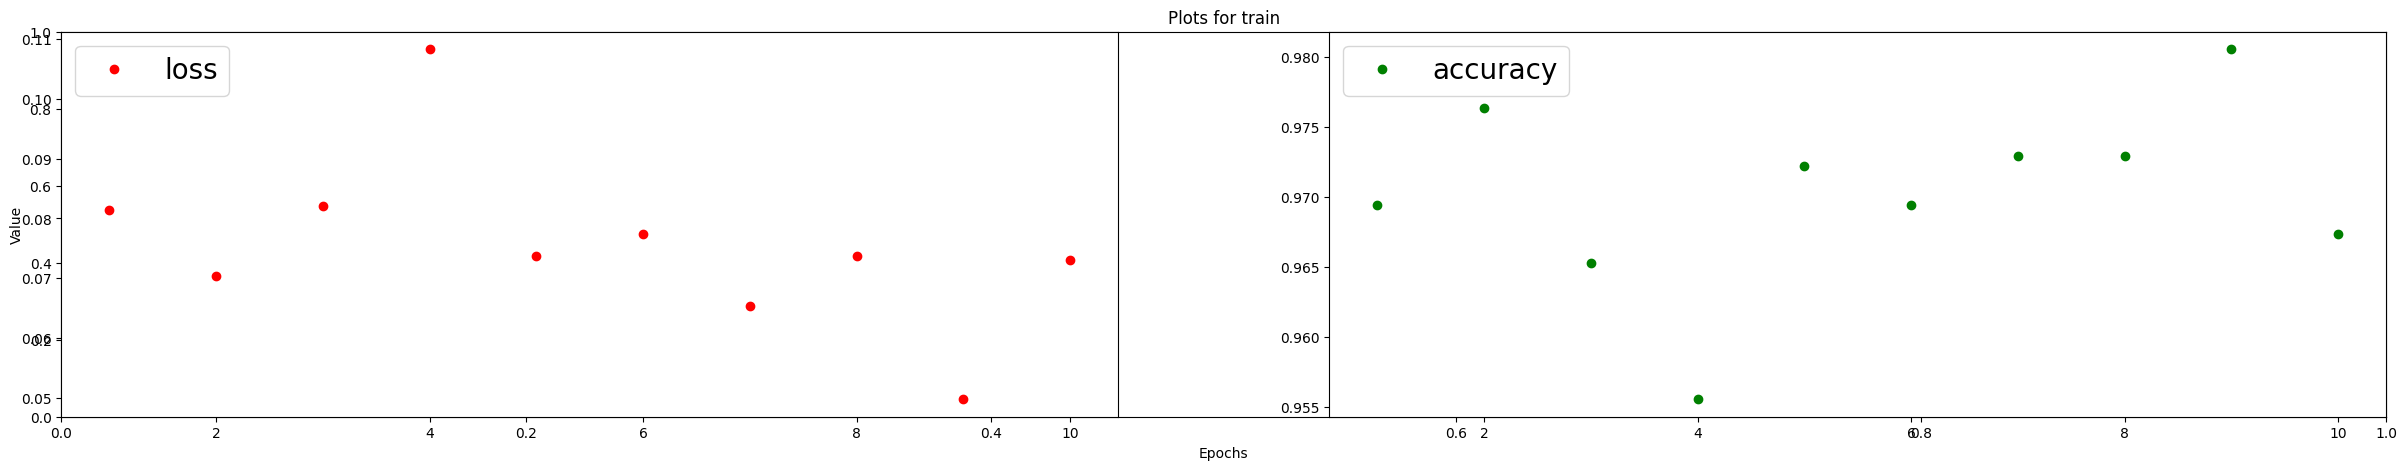

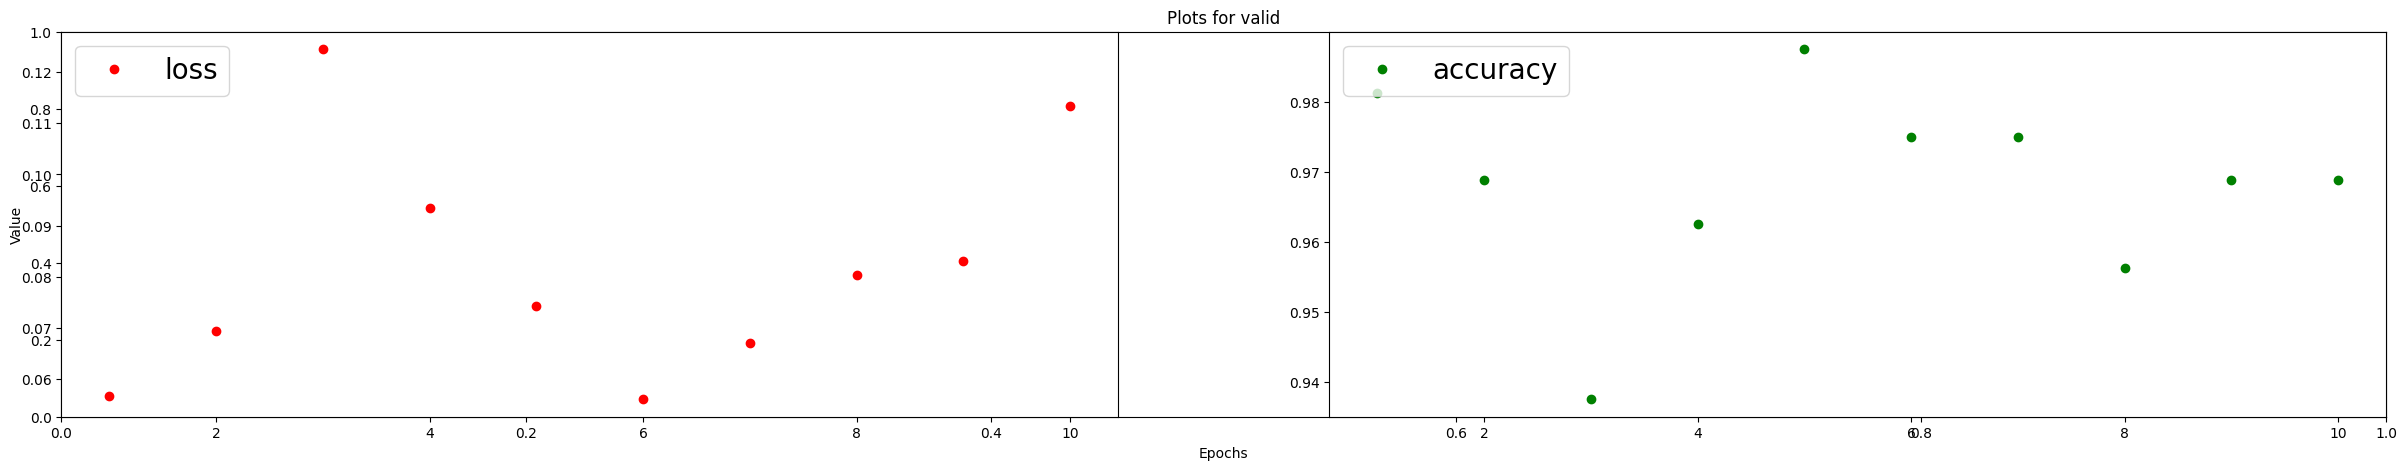

In [25]:
print('Learning rate: 0.001, Batch size: 20')

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=20, shuffle=True )
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size=20, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=20, shuffle=True)

train_loop(train_loader, val_loader, epochs)

Learning rate: 0.0005, Batch size: 20
Epoch : 1, train accuracy : 0.9666667580604553, train loss : 0.07723208516836166
Epoch : 1, val_accuracy : 0.9749999642372131, val_loss : 0.07841946929693222
Epoch : 2, train accuracy : 0.9715279340744019, train loss : 0.0690498948097229
Epoch : 2, val_accuracy : 0.9624999165534973, val_loss : 0.07738089561462402
Epoch : 3, train accuracy : 0.9805557131767273, train loss : 0.05871892720460892
Epoch : 3, val_accuracy : 0.9749999642372131, val_loss : 0.08275118470191956
Epoch : 4, train accuracy : 0.9673611521720886, train loss : 0.07154850661754608
Epoch : 4, val_accuracy : 0.949999988079071, val_loss : 0.07571142911911011
Epoch : 5, train accuracy : 0.9791668653488159, train loss : 0.053812406957149506
Epoch : 5, val_accuracy : 0.9874999523162842, val_loss : 0.04691029340028763
Epoch : 6, train accuracy : 0.9791668653488159, train loss : 0.04211880639195442
Epoch : 6, val_accuracy : 0.9749999642372131, val_loss : 0.06235159933567047
Epoch : 7, trai

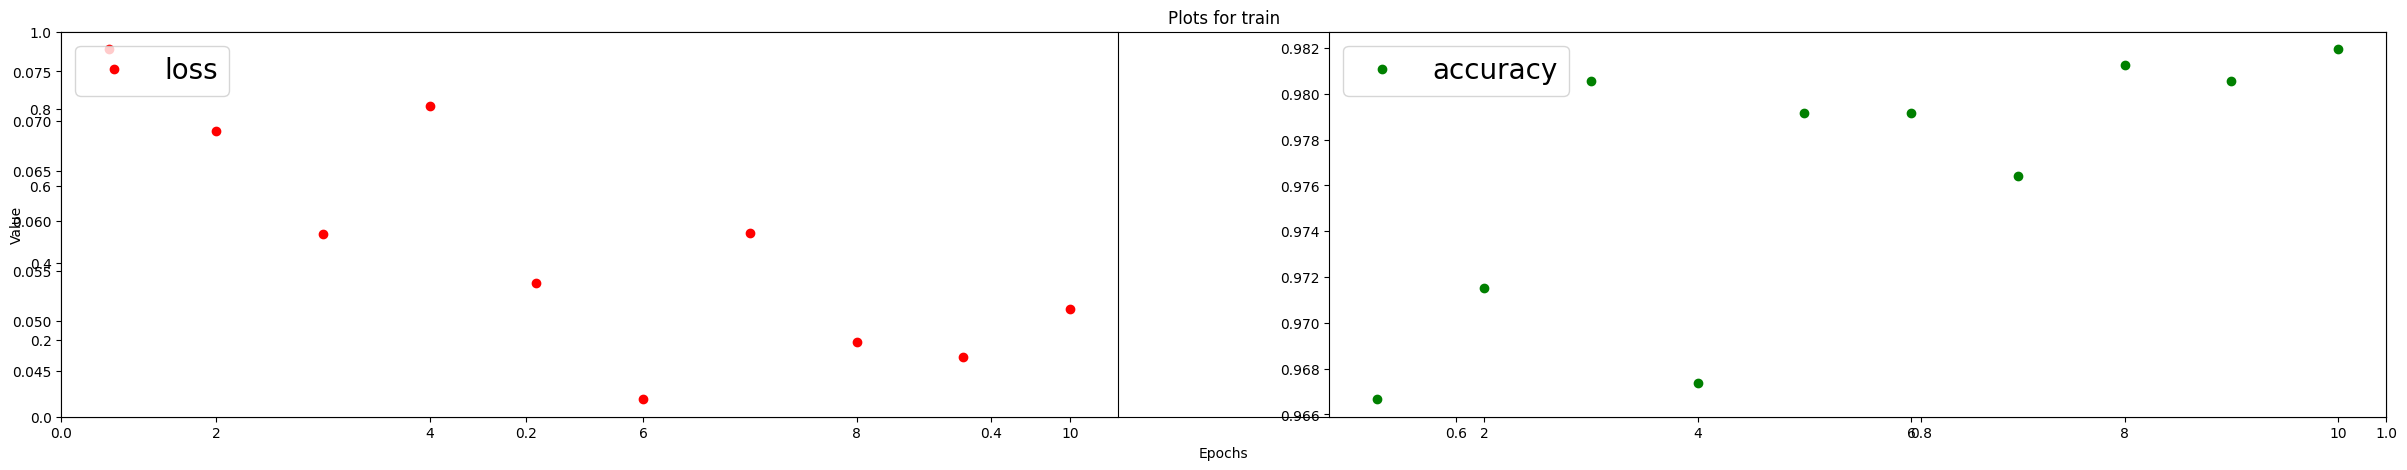

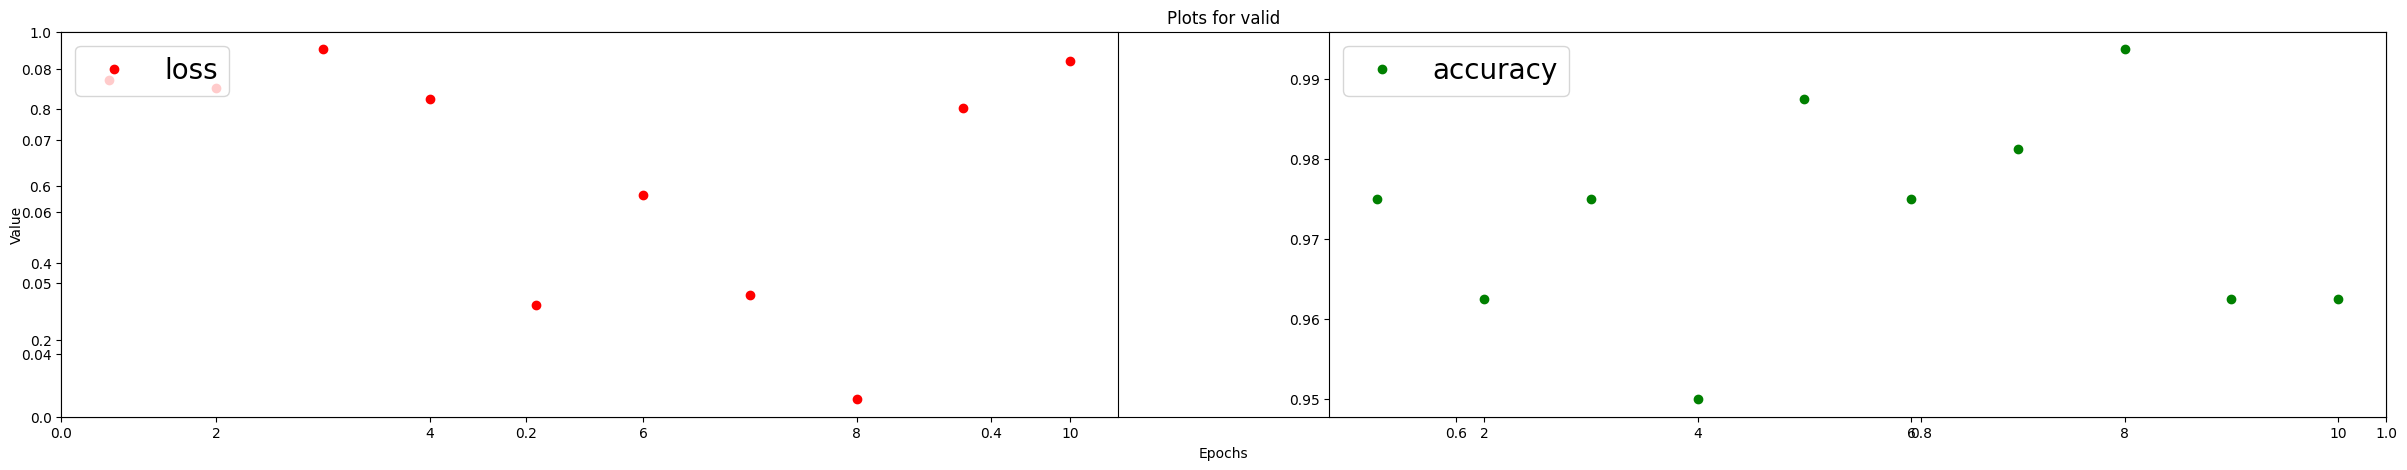

In [26]:
print('Learning rate: 0.0005, Batch size: 20')

optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=20, shuffle=True )
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size=20, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=20, shuffle=True)

train_loop(train_loader, val_loader, epochs)

Learning rate: 0.0007, Batch size: 20
Epoch : 1, train accuracy : 0.9680556058883667, train loss : 0.07944834232330322
Epoch : 1, val_accuracy : 0.96875, val_loss : 0.08608854562044144
Epoch : 2, train accuracy : 0.979861319065094, train loss : 0.05634581297636032
Epoch : 2, val_accuracy : 0.981249988079071, val_loss : 0.04735959321260452
Epoch : 3, train accuracy : 0.979861319065094, train loss : 0.05309446156024933
Epoch : 3, val_accuracy : 0.987500011920929, val_loss : 0.03753393515944481
Epoch : 4, train accuracy : 0.9805557727813721, train loss : 0.05330708622932434
Epoch : 4, val_accuracy : 0.9937499761581421, val_loss : 0.035848867148160934
Epoch : 5, train accuracy : 0.9847224354743958, train loss : 0.047601599246263504
Epoch : 5, val_accuracy : 0.96875, val_loss : 0.06816660612821579
Epoch : 6, train accuracy : 0.9784723520278931, train loss : 0.04884366691112518
Epoch : 6, val_accuracy : 0.981249988079071, val_loss : 0.09910573065280914
Epoch : 7, train accuracy : 0.976389110

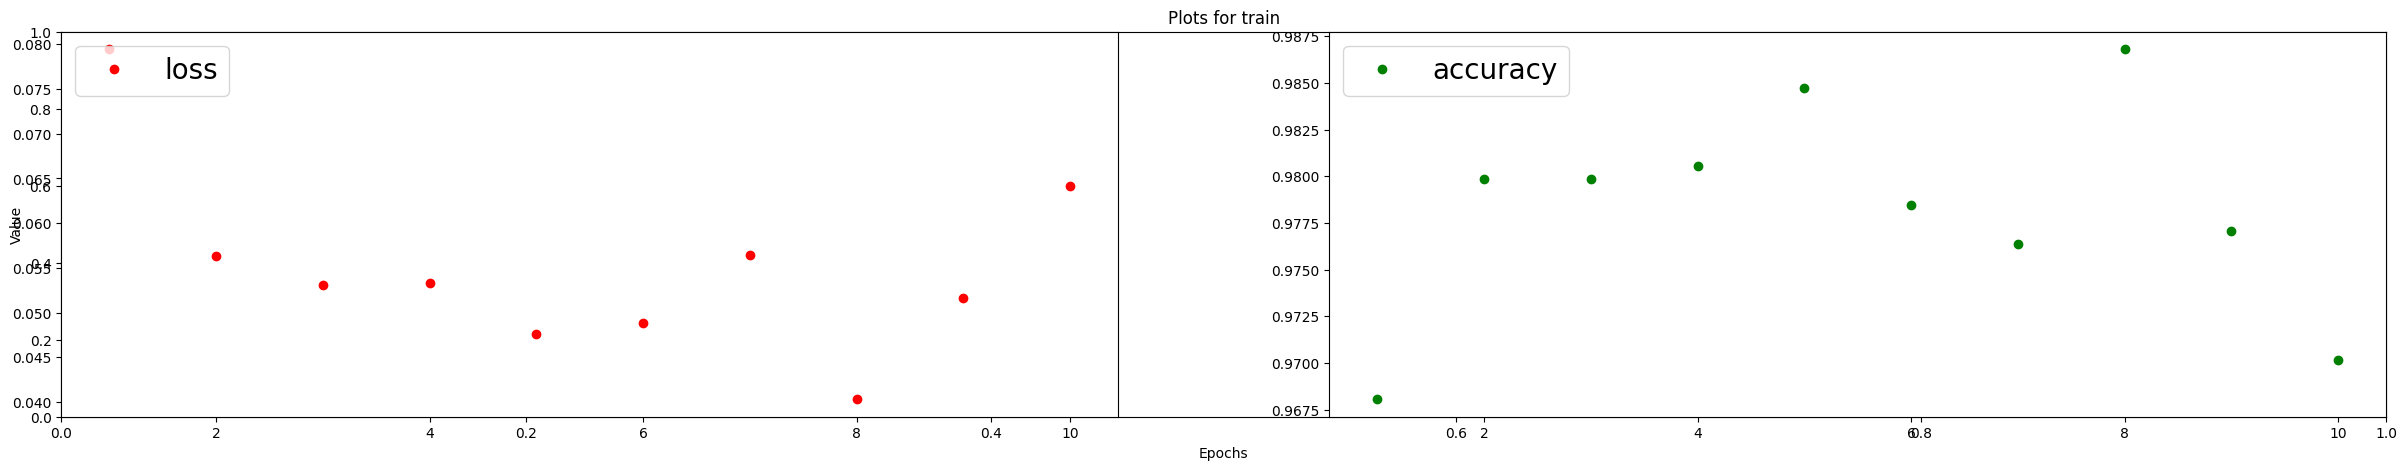

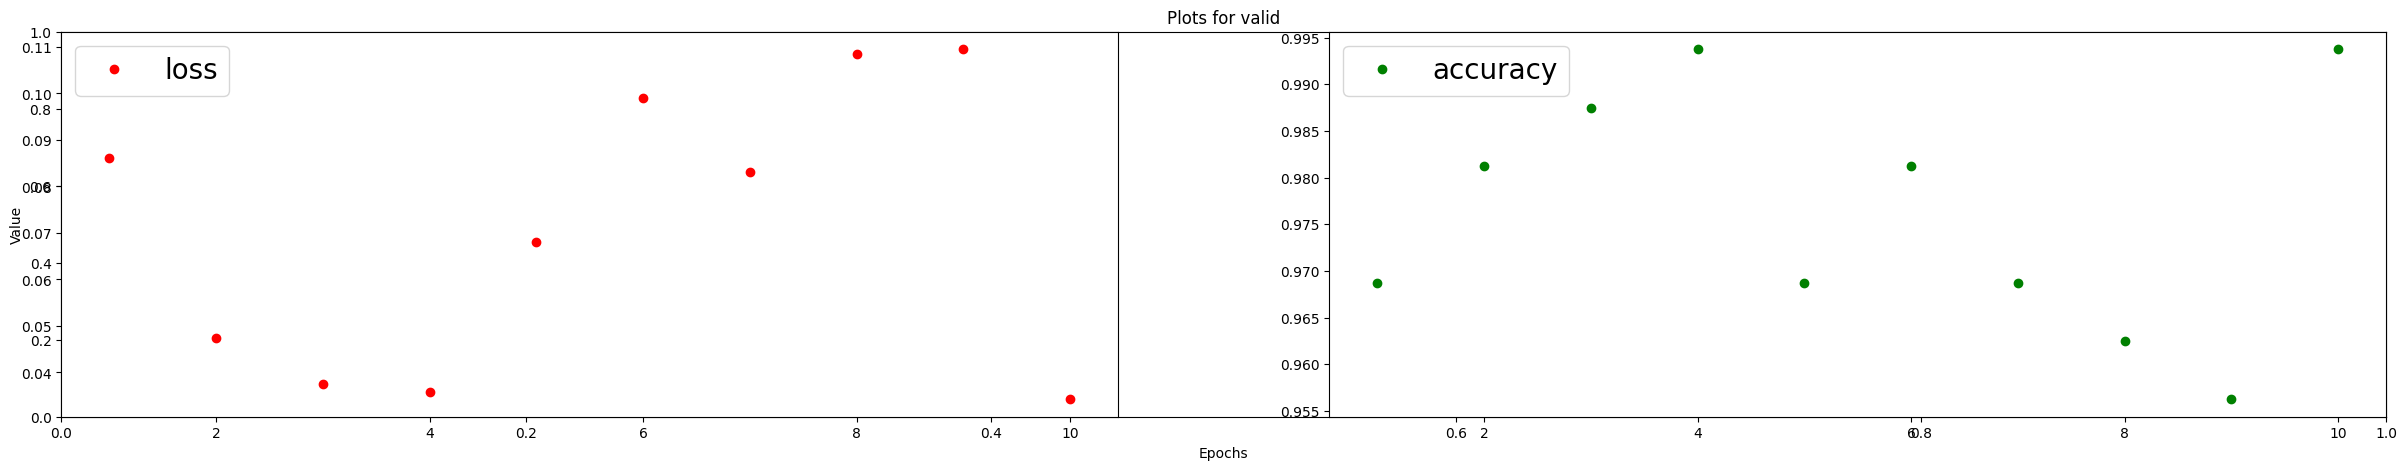

In [27]:
print('Learning rate: 0.0007, Batch size: 20')

optimizer = torch.optim.Adam(model.parameters(), lr=0.0007)

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=20, shuffle=True )
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size=20, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=20, shuffle=True)

train_loop(train_loader, val_loader, epochs)

Learning rate: 0.001, Batch size: 50
Epoch : 1, train accuracy : 0.980344831943512, train loss : 0.041754286736249924
Epoch : 1, val_accuracy : 0.9800000190734863, val_loss : 0.04764901474118233
Epoch : 2, train accuracy : 0.9768964052200317, train loss : 0.04866481199860573
Epoch : 2, val_accuracy : 0.9900000095367432, val_loss : 0.027060892432928085
Epoch : 3, train accuracy : 0.9820690155029297, train loss : 0.046471111476421356
Epoch : 3, val_accuracy : 0.9650000333786011, val_loss : 0.08593174070119858
Epoch : 4, train accuracy : 0.9848275780677795, train loss : 0.04046739265322685
Epoch : 4, val_accuracy : 0.9800000190734863, val_loss : 0.04534822702407837
Epoch : 5, train accuracy : 0.9839655756950378, train loss : 0.03938966989517212
Epoch : 5, val_accuracy : 0.9600000381469727, val_loss : 0.08987359702587128
Epoch : 6, train accuracy : 0.9827587008476257, train loss : 0.04494806006550789
Epoch : 6, val_accuracy : 0.9800000190734863, val_loss : 0.05481676757335663
Epoch : 7, tr

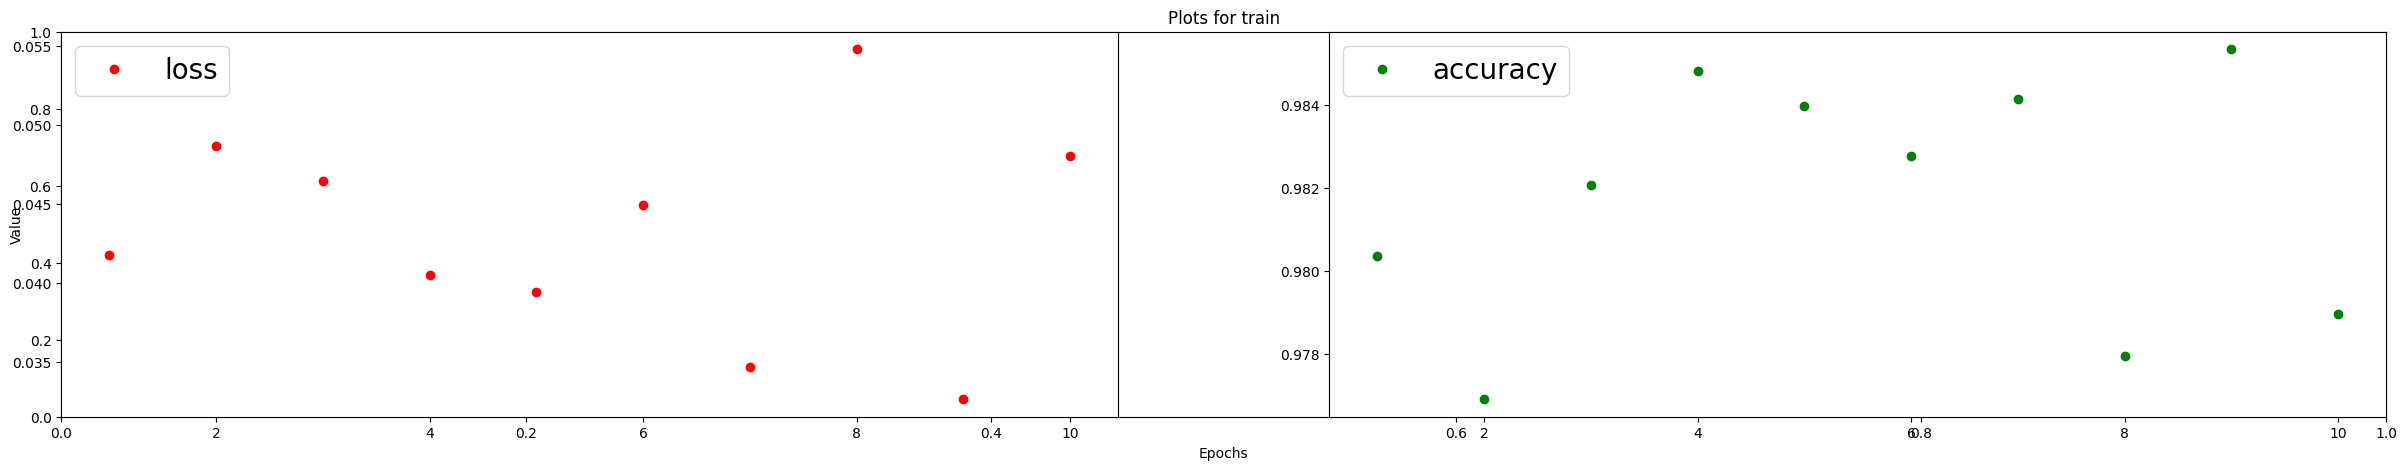

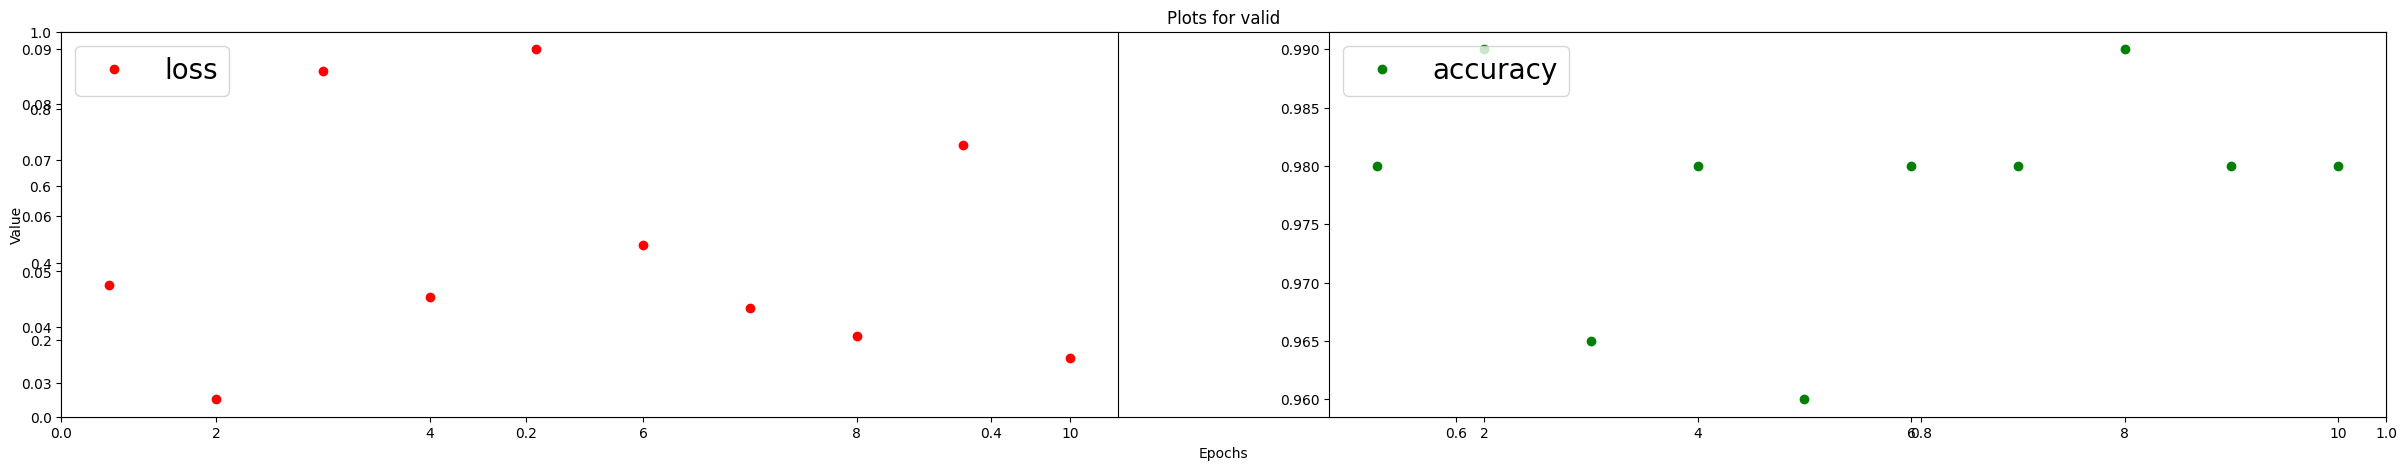

In [28]:
print('Learning rate: 0.001, Batch size: 50')

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=50, shuffle=True )
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size=50, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=50, shuffle=True)

train_loop(train_loader, val_loader, epochs)

Learning rate: 0.0007, Batch size: 50
Epoch : 1, train accuracy : 0.9743102788925171, train loss : 0.06242767721414566
Epoch : 1, val_accuracy : 0.9550000429153442, val_loss : 0.11641808599233627
Epoch : 2, train accuracy : 0.9834483861923218, train loss : 0.04216323047876358
Epoch : 2, val_accuracy : 0.9750000238418579, val_loss : 0.07266699522733688
Epoch : 3, train accuracy : 0.9832757711410522, train loss : 0.03681042790412903
Epoch : 3, val_accuracy : 0.9900000095367432, val_loss : 0.02883283980190754
Epoch : 4, train accuracy : 0.986034631729126, train loss : 0.04226316884160042
Epoch : 4, val_accuracy : 0.9900000095367432, val_loss : 0.021819423884153366
Epoch : 5, train accuracy : 0.9820690155029297, train loss : 0.03994863107800484
Epoch : 5, val_accuracy : 0.9900000095367432, val_loss : 0.03474318981170654
Epoch : 6, train accuracy : 0.9853448867797852, train loss : 0.04087639972567558
Epoch : 6, val_accuracy : 0.9800000190734863, val_loss : 0.04653928428888321
Epoch : 7, tra

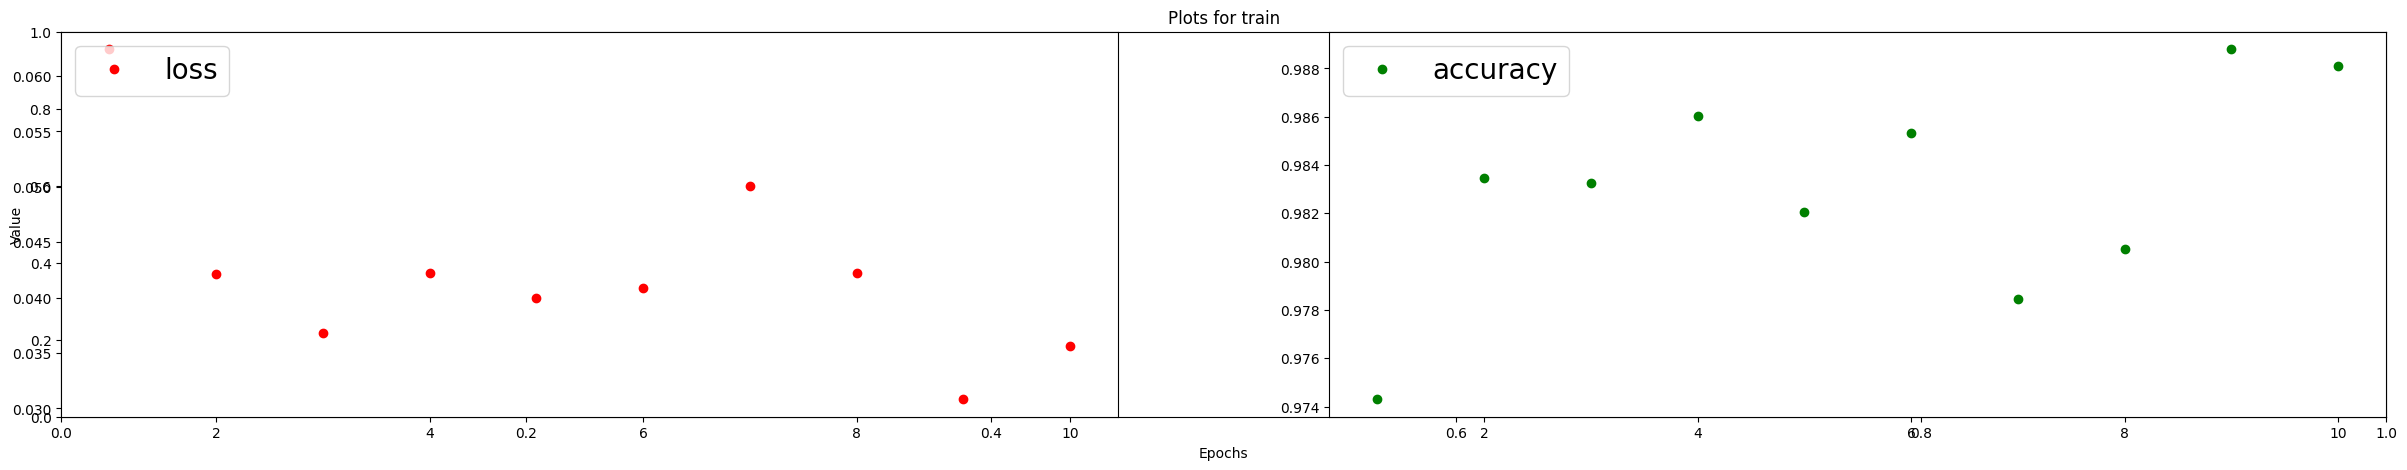

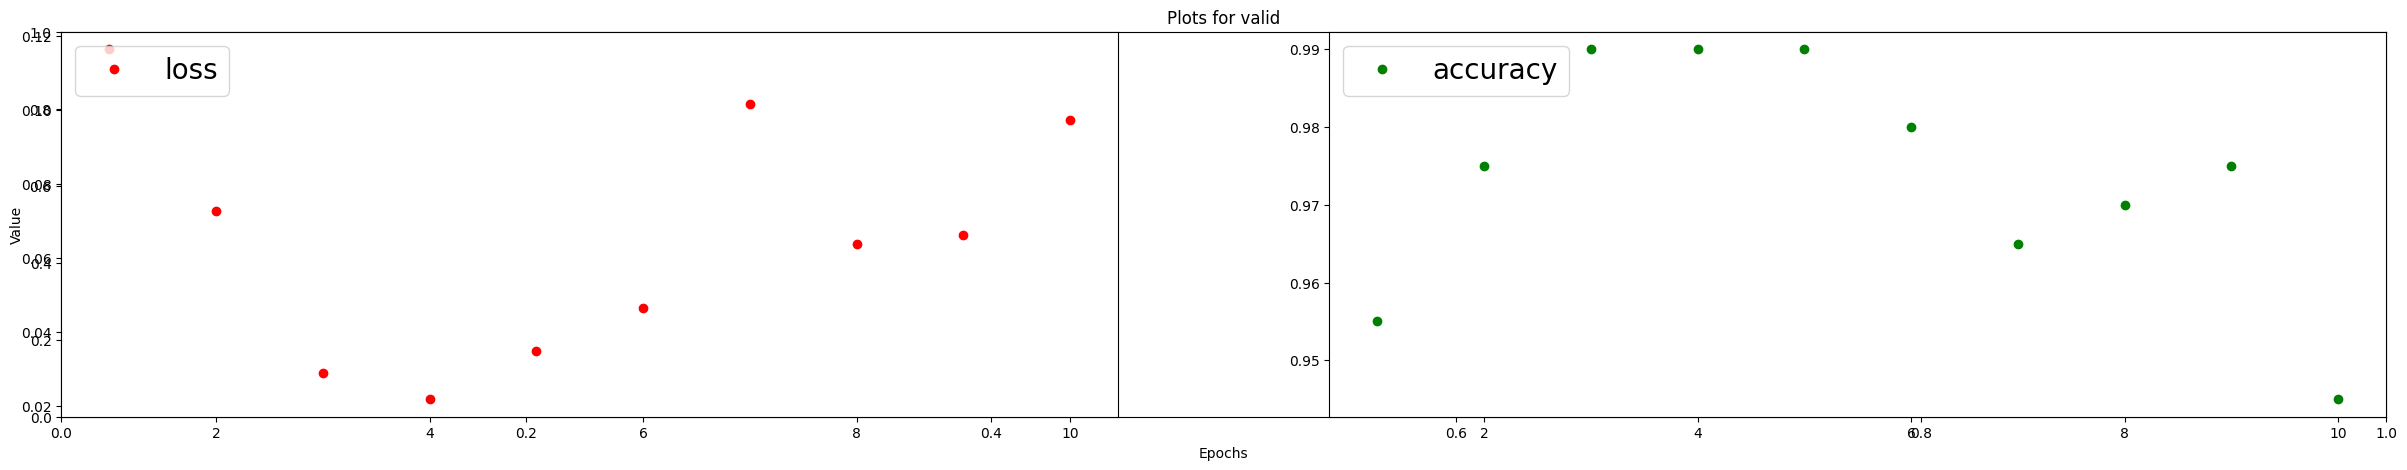

In [29]:
print('Learning rate: 0.0007, Batch size: 50')

optimizer = torch.optim.Adam(model.parameters(), lr=0.0007)

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=50, shuffle=True )
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size=50, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=50, shuffle=True)

train_loop(train_loader, val_loader, epochs)

In [30]:
zebra_probs = []
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        preds = model(images)
        preds_list = F.softmax(preds, dim=1)[:, 1].tolist()
        zebra_probs += list(zip(labels, preds_list))

idx = list(map(lambda x: x[0],zebra_probs))
prob = list(map(lambda x: x[1],zebra_probs))

submission = pd.DataFrame({'id':idx,'label':prob})

submission

id         label
0    1838  4.269504e-02
1     845  9.999943e-01
2    1826  1.266850e-07
3     809  9.994012e-01
4    1830  2.498754e-08
..    ...           ...
195   826  9.999990e-01
196   805  1.000000e+00
197   874  1.000000e+00
198   828  9.999884e-01
199   864  9.282617e-01

[200 rows x 2 columns]

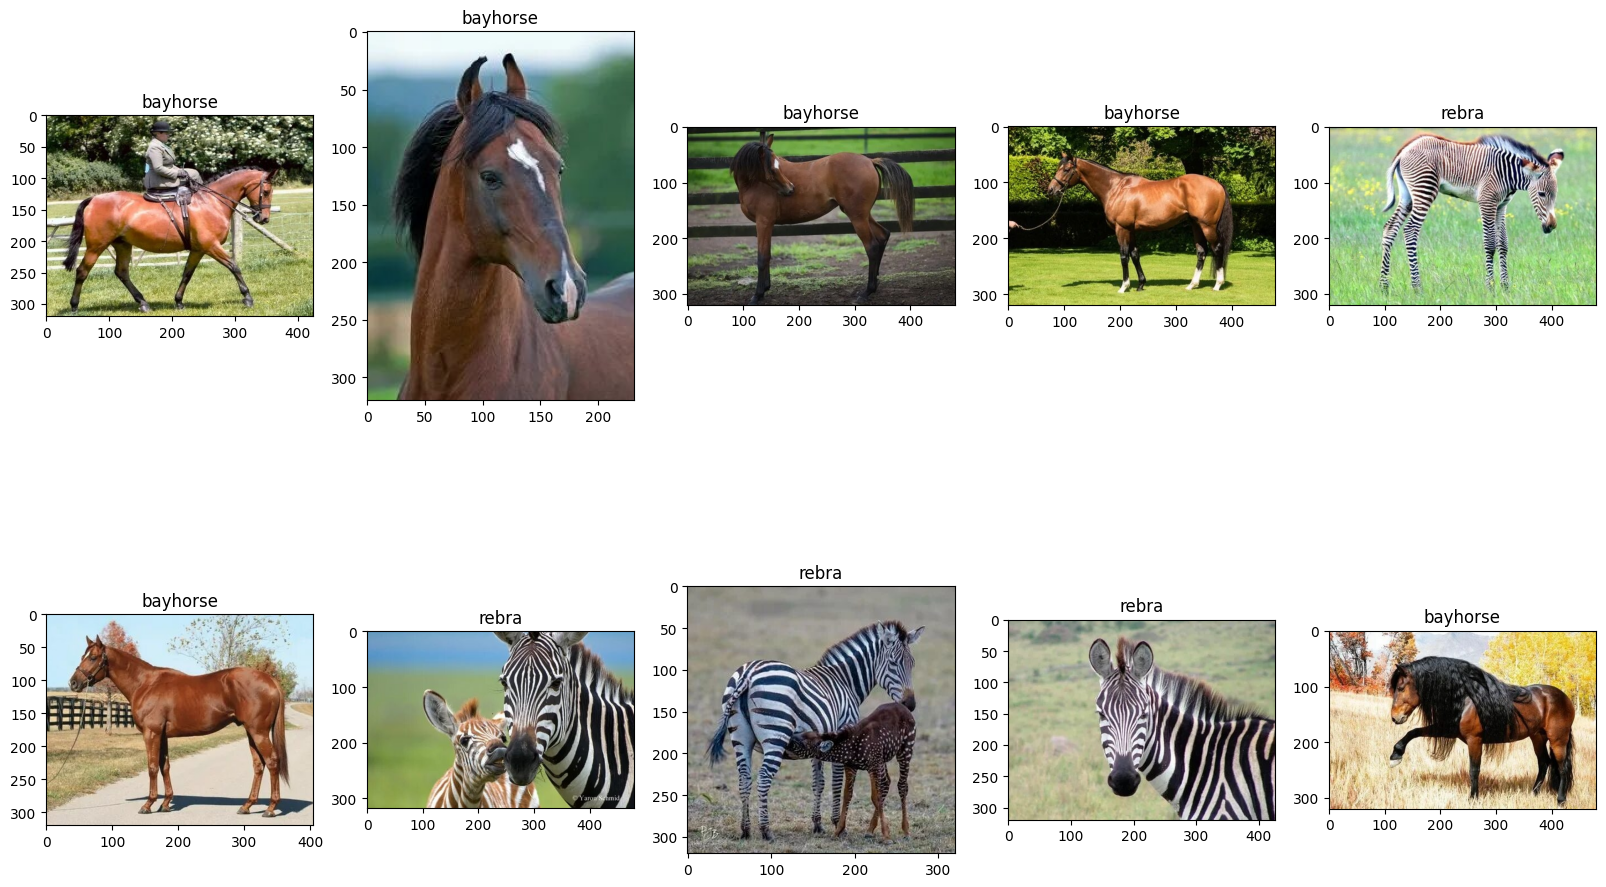

In [35]:
class_ = {0: 'bayhorse', 1: 'rebra'}

fig, axes = plt.subplots(2, 5, figsize=(20, 12), facecolor='w')

for ax in axes.ravel():

    i = random.choice(submission['id'].values)

    label = submission.loc[submission['id'] == i, 'label'].values[0]
    if label > 0.5:
        label = 1
    else:
        label = 0

    img_path = os.path.join(test_path, f'{i}.jpg')
    img = Image.open(img_path)

    ax.set_title(class_[label])
    ax.imshow(img)

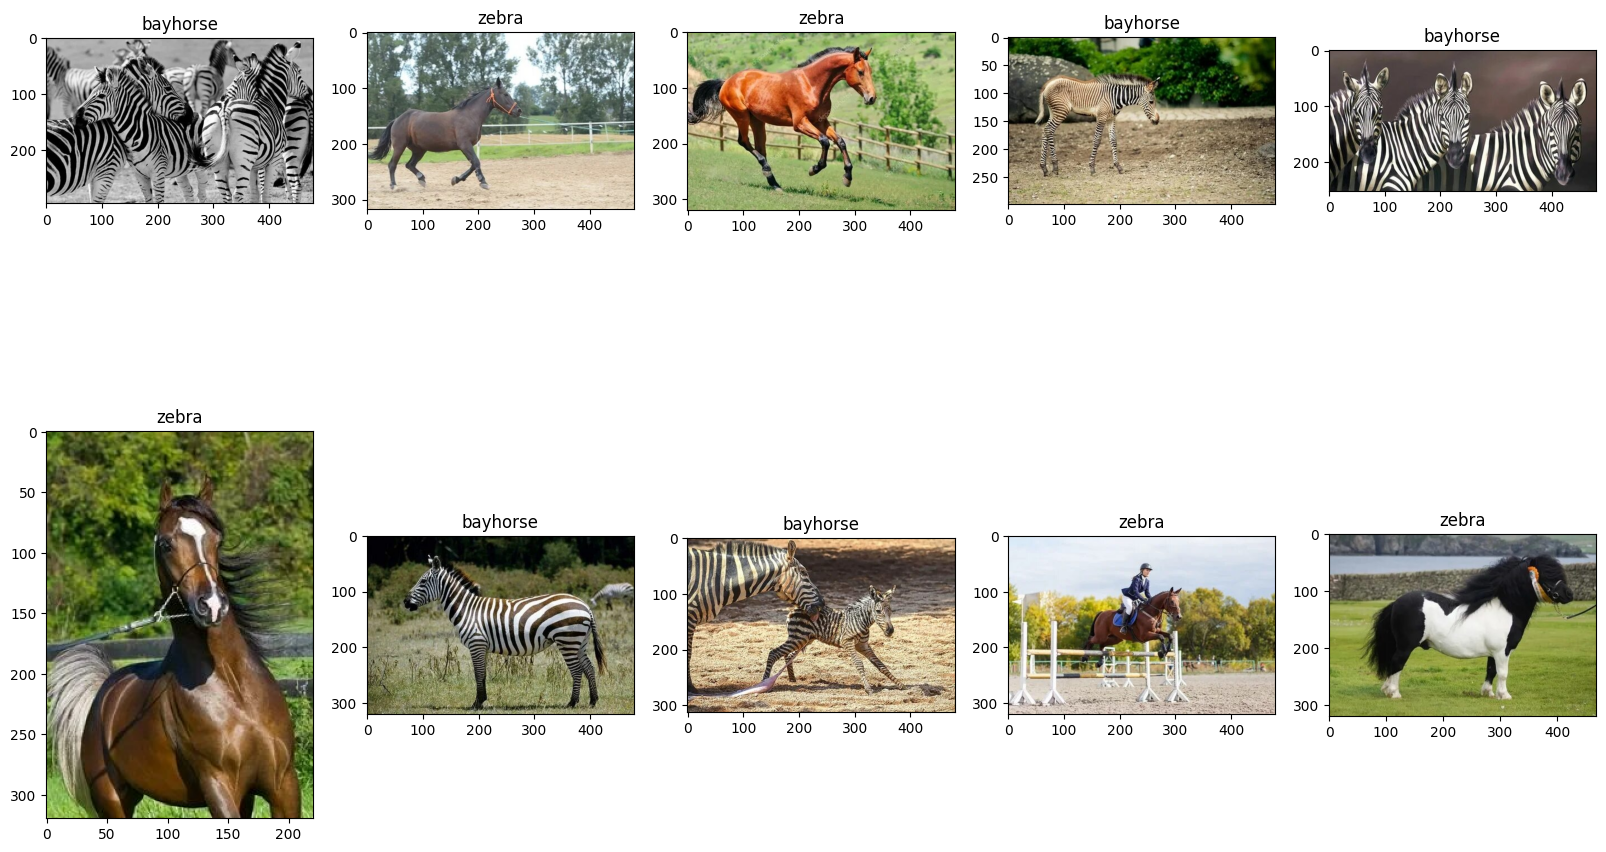

In [36]:
torch.save(model.state_dict(), 'ConvNetModel.pth')

loaded_model = ConvNet().to(device)
loaded_model.load_state_dict(torch.load('ConvNetModel.pth'))
loaded_model.eval()

leopard_probs = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        preds = loaded_model(images)
        preds_list = F.softmax(preds, dim=1)[:, 1].tolist()
        leopard_probs += list(zip(labels, preds_list))

idx = list(map(lambda x: x[0],leopard_probs))
prob = list(map(lambda x: x[1],leopard_probs))

submission = pd.DataFrame({'id':idx,'label':prob})

class_ = {0: 'zebra', 1: 'bayhorse'}

fig, axes = plt.subplots(2, 5, figsize=(20, 12), facecolor='w')

for ax in axes.ravel():

    i = random.choice(submission['id'].values)

    label = submission.loc[submission['id'] == i, 'label'].values[0]
    if label > 0.5:
        label = 1
    else:
        label = 0

    img_path = os.path.join(test_path, f'{i}.jpg')
    img = Image.open(img_path)

    ax.set_title(class_[label])
    ax.imshow(img)